[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/idealo/image-super-resolution/blob/master/notebooks/ISR_Prediction_Tutorial.ipynb)

# Install ISR
(skip if using local repo)

# Predict

Download a sample image

Load the image with PIL

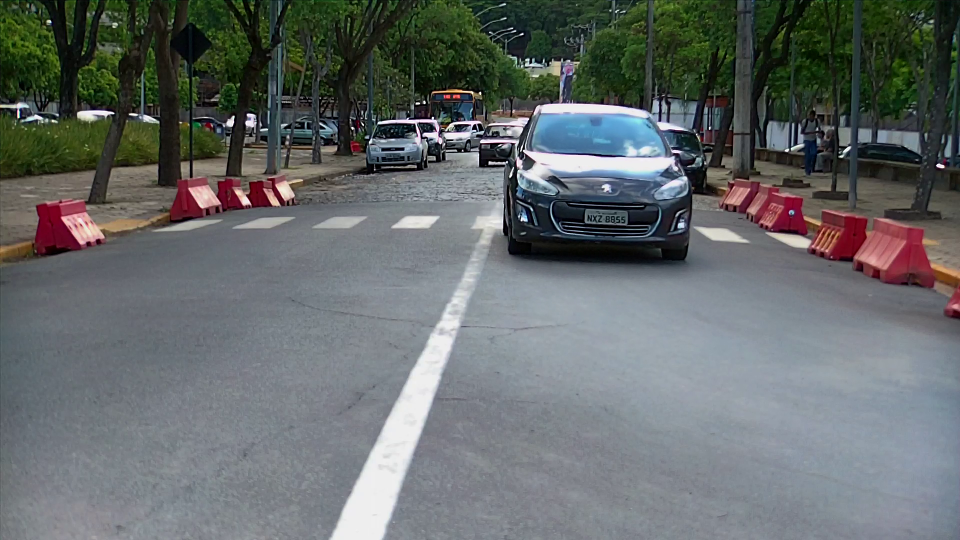

In [1]:
import numpy as np
from PIL import Image

img = Image.open('/media/jhonatan/Data/h6f86gl(2)/final/lr_test/00003.png')
img

## Get predictions

### Create the model and run prediction
Create a RRDN or RDN model with the provided pre-trained weights, choose one

#### Alternatively, load your own weights
To load your own weights first build the model specifying the architecture parameters and then load the weights like with any Keras model.

In [8]:
from ISR.models import RRDN

rrdn = RRDN(arch_params={'C':4, 'D':3, 'G':64, 'G0':64, 'T':10, 'x':2})
rrdn.model.load_weights('/home/jhonatan/Documents/TCC/image-super-resolution/weights/rrdn-C4-D3-G64-G064-T10-x2/2020-09-21_2142/rrdn-C4-D3-G64-G064-T10-x2_best-val_generator_loss_epoch099.hdf5')


ValueError: Attempted relative import in non-package

#### Baseline

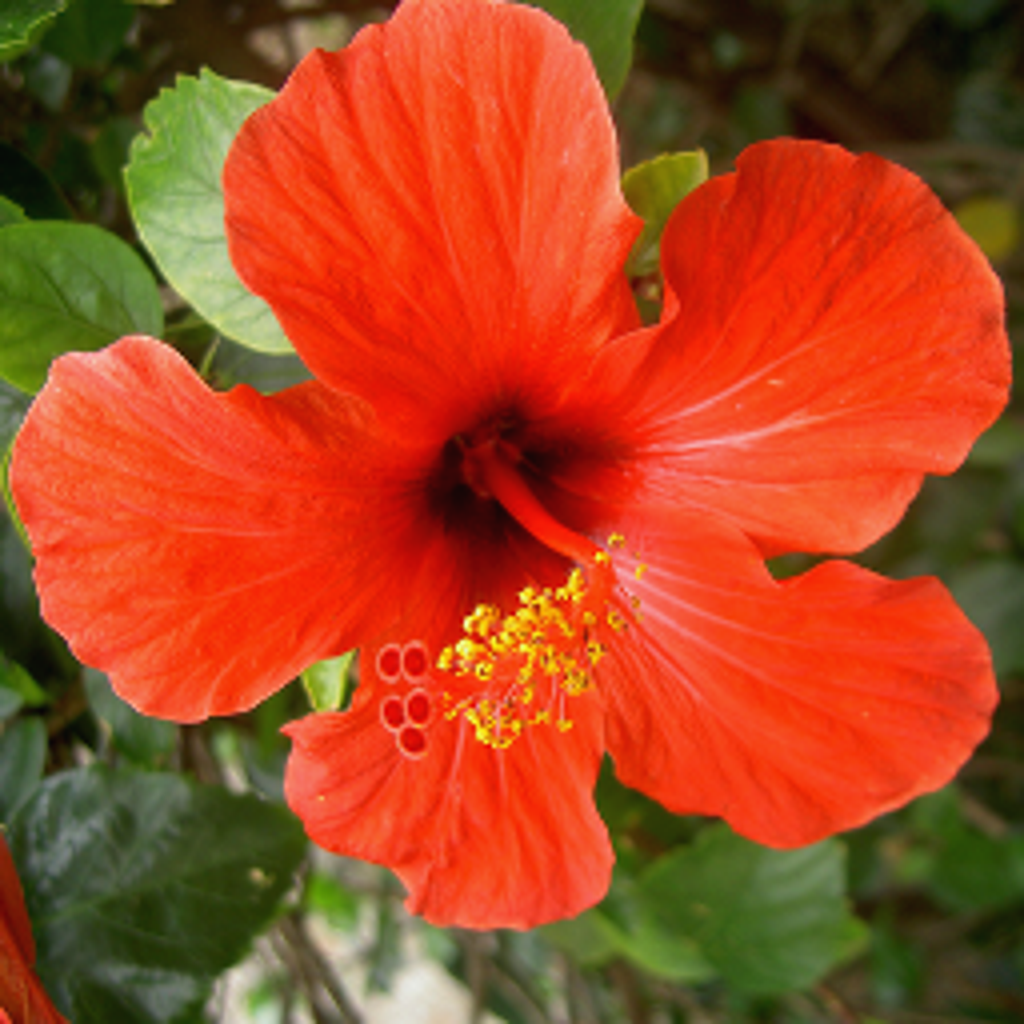

In [42]:
img.resize(size=(img.size[0]*4, img.size[1]*4), resample=Image.BICUBIC)

#### Prediction

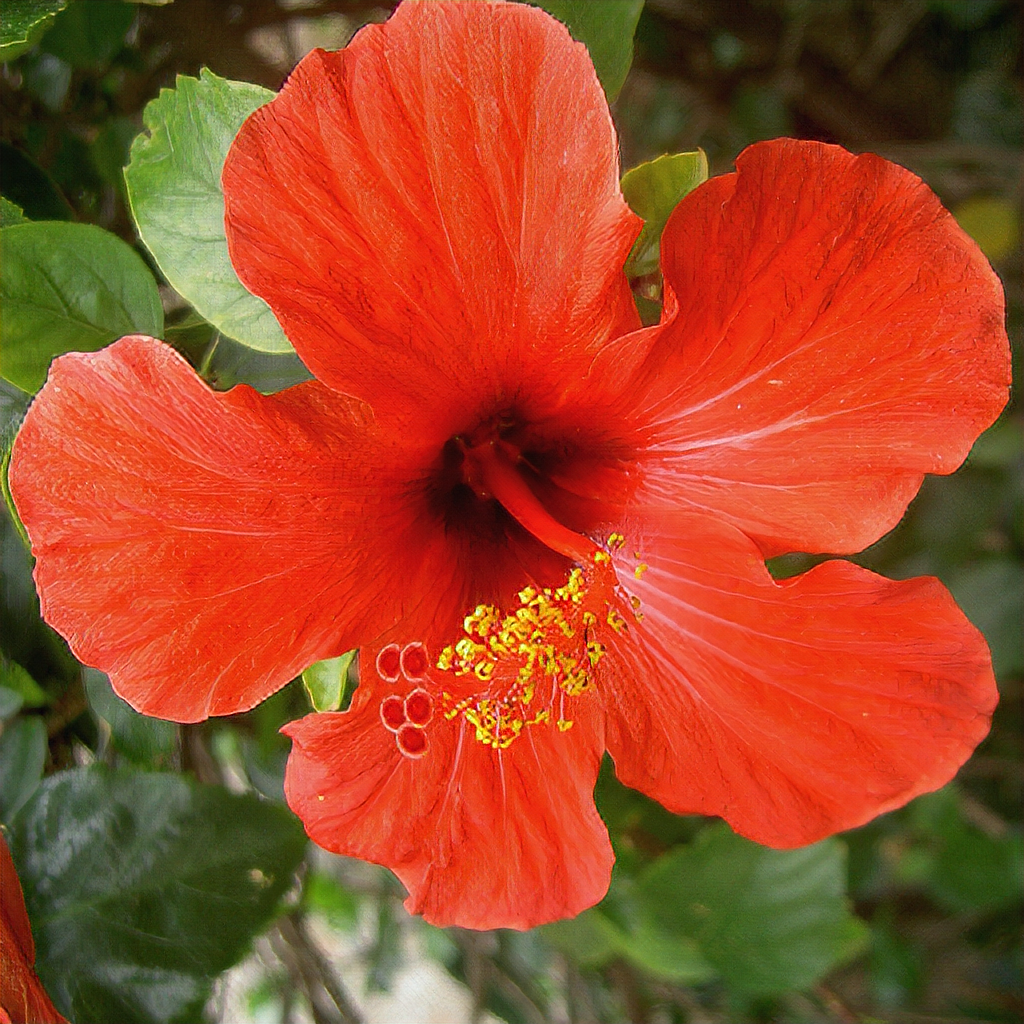

In [12]:
sr_img = model.predict(np.array(img))
Image.fromarray(sr_img)

### Usecase: upscaling noisy images

Compress the image into the jpeg format to introduce compression artefact and lose some information.

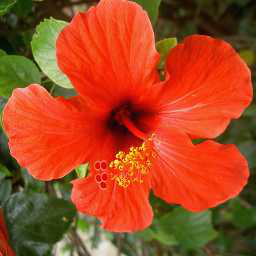

In [36]:
img.save('data/input/test_images/compressed.jpeg','JPEG', dpi=[300, 300], quality=50)
compressed_img = Image.open('data/input/test_images/compressed.jpeg')

compressed_img

#### Baseline

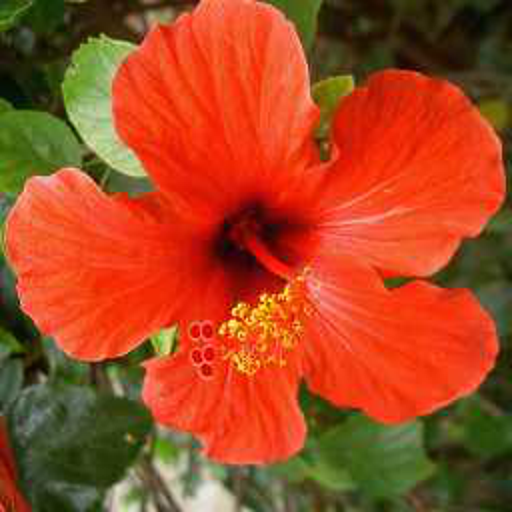

In [11]:
compressed_img.resize(size=(compressed_img.size[0]*2, compressed_img.size[1]*2), resample=Image.BICUBIC)

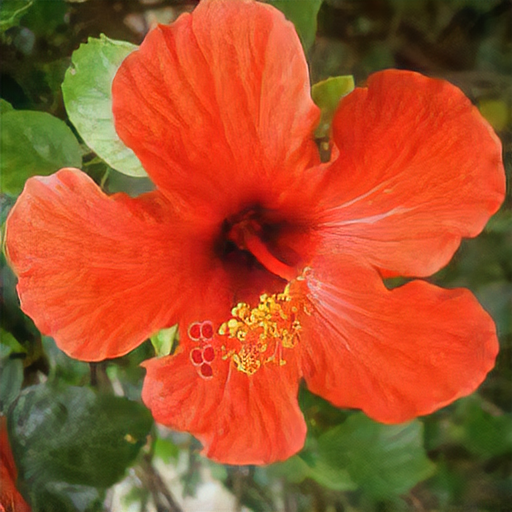

In [39]:
model = RDN(weights='noise-cancel')
sr_img = model.predict(np.array(compressed_img))
Image.fromarray(sr_img)

### Predictor Class
You can also use the predictor class to run the model on entire folders:

In [ ]:
from ISR.predict import Predictor
!mkdir -p data/output
predictor = Predictor(input_dir='data/input/test_images/')
predictor.get_predictions(model=rdn, weights_path='weights/rdn-C6-D20-G64-G064-x2_ArtefactCancelling_epoch219.hdf5')